# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arquivo_csv = r'\Users\Meu Computador\anaconda3\@ EBAC\Descritiva 1\Atividade 1 - Sinasc.csv'
sinasc_csv = pd.read_csv(arquivo_csv)
sinasc_csv.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [8]:
df_sinasc = pd.DataFrame(sinasc_csv)
df_sinasc['APGAR5']

0        10.0
1         9.0
2        10.0
3        10.0
4        10.0
         ... 
27023     9.0
27024     9.0
27025    10.0
27026     9.0
27027     8.0
Name: APGAR5, Length: 27028, dtype: float64

In [10]:
df_sinasc.loc[df_sinasc['APGAR5'] <= 3, 'categoria_apgar5'] = 'asfixia grave'
df_sinasc.loc[(df_sinasc['APGAR5'] >= 4) & (df_sinasc['APGAR5'] <= 5), 'categoria_apgar5'] = 'asfixia moderada'
df_sinasc.loc[(df_sinasc['APGAR5'] >= 6) & (df_sinasc['APGAR5'] <= 7), 'categoria_apgar5'] = 'asfixia leve'
df_sinasc.loc[(df_sinasc['APGAR5'] >= 8) & (df_sinasc['APGAR5'] <= 10), 'categoria_apgar5'] = 'asfixia normal'

In [12]:
coluna_apgar5 = df_sinasc[['categoria_apgar5']]
coluna_apgar5

,categoria_apgar5
0,asfixia normal
1,asfixia normal
2,asfixia normal
3,asfixia normal
4,asfixia normal
...,...
27023,asfixia normal
27024,asfixia normal
27025,asfixia normal
27026,asfixia normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

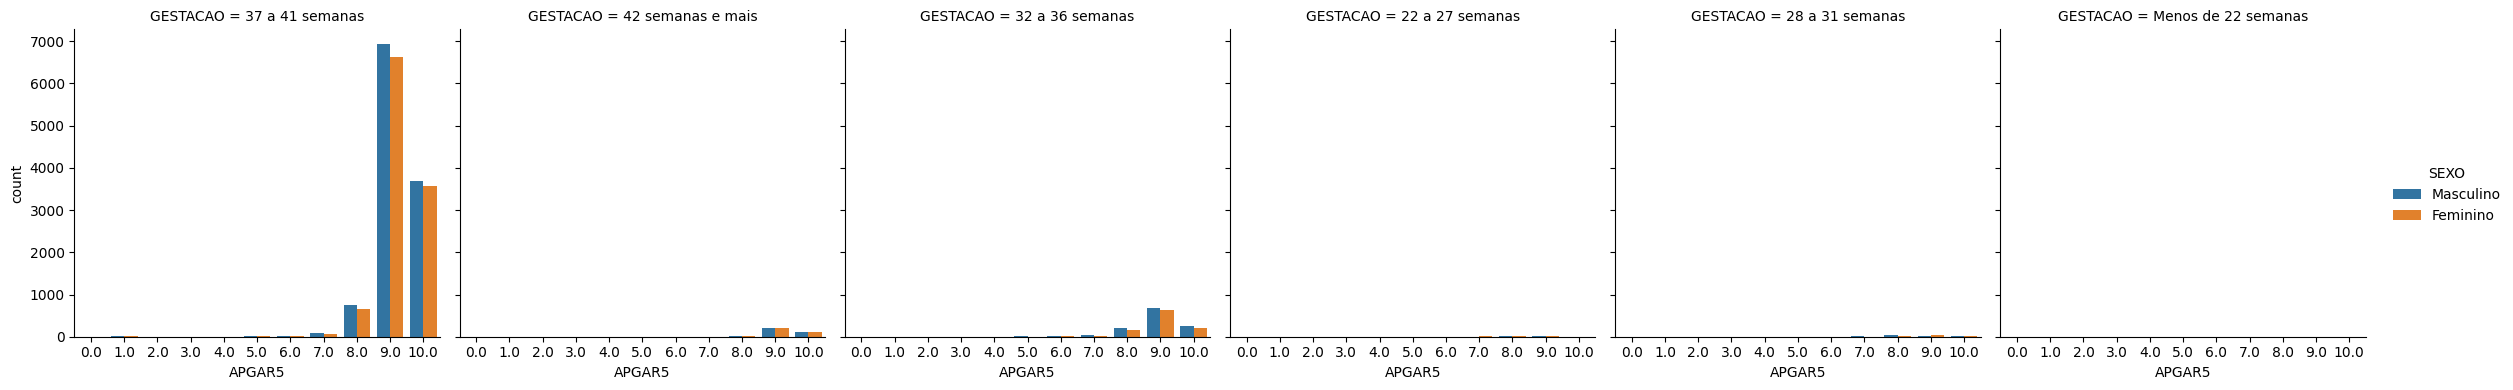

In [14]:
sns.catplot(
    data=df_sinasc,
    x="APGAR5",          # Variável categórica no eixo X
    hue="SEXO",          # Diferencia por sexo
    col="GESTACAO",      # Facetas por grupo de tempo de gestação
    kind="count",        # Tipo de gráfico: contagem
    height=4,            # Altura de cada gráfico
    aspect=1             # Aspecto do gráfico
)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [17]:
tab_cruzada = pd.crosstab(sinasc_csv['GESTACAO'], sinasc_csv['APGAR5'])
tab_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [97]:
percente = tab_cruzada.div(tab_cruzada.sum(axis=1), axis=0)

percente_percentual = percente * 100
percente_formatado = percente_percentual.apply(lambda col: col.map(lambda x: f"{x:.2f}%"))
percente_formatado

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.24%,0.00%,9.41%,7.06%,1.18%,0.00%,2.35%,11.76%,28.24%,22.35%,9.41%
28 a 31 semanas,0.00%,0.00%,1.23%,0.62%,3.09%,4.32%,4.32%,6.79%,37.65%,33.95%,8.02%
32 a 36 semanas,0.09%,0.09%,0.09%,0.09%,0.36%,0.49%,0.76%,2.51%,16.20%,58.50%,20.81%
37 a 41 semanas,0.02%,0.09%,0.01%,0.02%,0.03%,0.09%,0.20%,0.67%,6.29%,60.23%,32.34%
42 semanas e mais,0.14%,0.00%,0.00%,0.00%,0.00%,0.14%,0.14%,0.72%,6.30%,60.60%,31.95%
Menos de 22 semanas,14.29%,0.00%,14.29%,0.00%,0.00%,0.00%,0.00%,14.29%,0.00%,42.86%,14.29%


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '22 a 27 semanas'),
  Text(1, 0, '28 a 31 semanas'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '37 a 41 semanas'),
  Text(4, 0, '42 semanas e mais'),
  Text(5, 0, 'Menos de 22 semanas')])

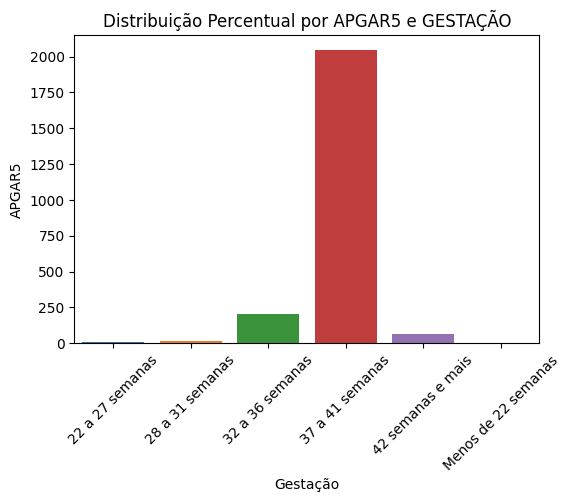

In [132]:
percente_transposto = tab_cruzada.T
plt.figure(figsize=(6, 4))
sns.barplot(data=percente_transposto, errorbar = None)

plt.title('Distribuição Percentual por APGAR5 e GESTAÇÃO')
plt.xlabel('Gestação')
plt.ylabel('APGAR5')
plt.xticks(rotation=45)


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

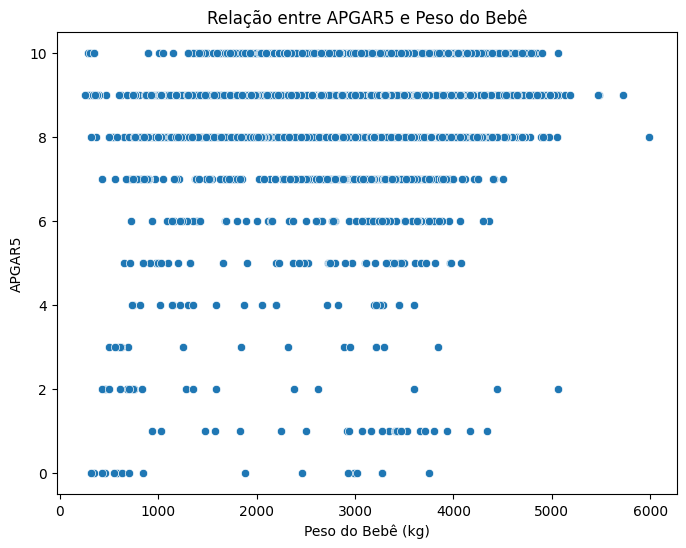

In [156]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PESO', y='APGAR5', data=df_sinasc)

plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('Peso do Bebê (kg)')
plt.ylabel('APGAR5')
plt.show()